# <center> <font style="color:rgb(100,109,254)"> Face Detection with Dnn Module</font> </center>
In this notebook you'll see how to perform face detection using an SSD architecture. This detector is far more efficient than Haar cascades, it can even detect faces at different Orientations.

In [ ]:
# Importing Required libraries
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk 
import os
import sys

## <font style="color:rgb(134,19,348)">Select the model Path</font>


In [ ]:
# Load the Model Weights.
weights ='Media/M4/Model/res10_300x300_ssd_iter_140000.caffemodel'

# Load the Architecture.
arch= 'Media/M4/Model/deploy.prototxt.txt'

## <font style="color:rgb(134,19,348)"> Initializing the DNN Module </font>

In [ ]:
# Initialize the network.
net = cv2.dnn.readNetFromCaffe(arch, weights)

## <font style="color:rgb(134,19,348)"> Read An Image </font>

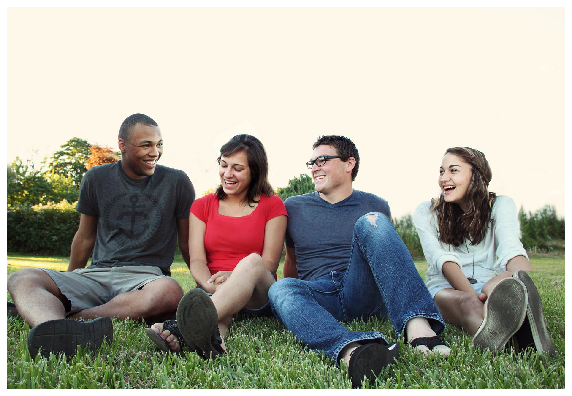

In [48]:
# Load the input image from disk
image = cv2.imread('Media/M4/face.jpeg')

# Display it
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,::-1])
plt.axis("off");

## <font style="color:rgb(134,19,348)"> Pre-processing the image </font>


In [49]:
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

## <font style="color:rgb(134,19,348)"> Input the Blob Image to the Network  </font>


In [50]:
net.setInput(blob)

##  <font style="color:rgb(134,19,348)">Forward Pass</font> 


In [51]:
%%time
face_detect = net.forward()

Wall time: 32 ms


In [52]:
# Output Shape
print('Shape of detection: {} \n'.format(face_detect.shape))
print('Confidence of First face: {:.2f}% \n'.format(face_detect[0, 0, 0, 2]*100))
print('Coordinates of First face: {} \n'.format(face_detect[0, 0, 0, 3:7]))

Shape of detection: (1, 1, 200, 7) 

Confidence of First face: 99.50% 

Coordinates of First face: [0.536445   0.3578344  0.61142504 0.46999252] 



##  <font style="color:rgb(134,19,348)">Iterate over all detected faces and draw bounding boxes</font> 

In [33]:
height, width = image.shape[:2]

#Loop over the all Detected faces
for i in range(0, face_detect.shape[2]):
    
    # Here we get confidence of detected faces
    conf = face_detect[0, 0, i, 2]
    
    # Set threshold for detected faces
    if conf > 0.5:
        
        # Convert into numpy array 
        size_array =  np.array([width, height, width, height])
        
        # Get coordinated of face and multiply with size_array
        rect = face_detect[0, 0, i, 3:7] * size_array
        
        # Change the datatpes of coordinates into integer and save each coordinate in variable
        (X, Y, W, H) = rect.astype("int")
        
        # Draw rectangle around the face
        cv2.rectangle(image, (X, Y), (W, H),(255, 0, 0), 3)
        
        # Also Display the confidence of detected faces 
        cv2.putText(image, "Detected {:.2f}%".format(conf * 100), (X, H+20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

##  <font style="color:rgb(134,19,348)">Display Detected Faces</font> 


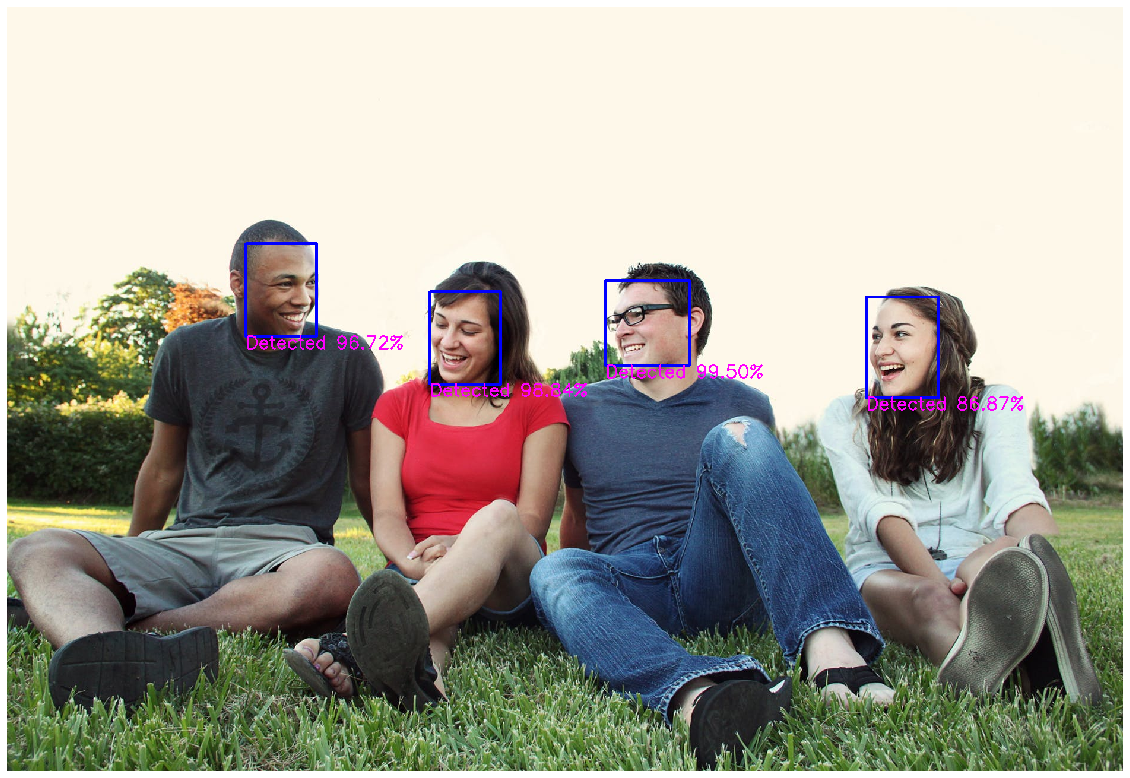

In [34]:
# Display Detected Faces
plt.figure(figsize=(20,20))
plt.imshow(image[:,:,::-1]);plt.axis("off");

## <font style="color:rgb(134,19,348)"> Creating Functions </font> 

## <font style="color:rgb(134,19,348)"> Initialization Function </font>
This method will be run once and it will initialize the network with the required files.

In [35]:
def init_detectface(usegpu = 'None',weights_name="res10_300x300_ssd_iter_140000.caffemodel",proto_name="deploy.prototxt.txt"):
    
    # Set global variables
    global net
    
    # Defining base path
    base_path = 'Media/M4/Model'
    
    # Defining model paths
    proto_file = os.path.join(base_path, proto_name)
    weights = os.path.join(base_path, weights_name) 
    
    # Initialize the DNN module
    net =  cv2.dnn.readNetFromCaffe(proto_file,weights)

    # If specified use either cuda based Nvidia gpu or opencl based Intel gpu.   
    if usegpu == 'cuda':
        net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
        
    elif usegpu == 'opencl':
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)    

## <font style="color:rgb(134,19,348)">  Main Function </font>

In [36]:
def detect_face(image=[], usercam=False, returndata=False,face_conf = 0.5):
    
    # If the user did'nt specified the image then consider then consider choosing file or camera snapshot.
    if np.size(image) == 0:
        
        # If usercam cam is True then take picture from camera
        if usercam:
            cap=cv2.VideoCapture(0, cv2.CAP_DSHOW)
            ret, frame=cap.read()
            if ret:
                image= cv2.flip(frame,1)
                cap.release()
            else:
                print('Cant Open Camera')
                sys.exit()
                
        # Otherwise select image from computer using tkinter        
        else:
            root = Tk()
            root.filename =  filedialog.askopenfilename(title = "Pick up the Image")
            root.withdraw()
            image = cv2.imread(root.filename)
     
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1.0,(300, 300), (104.0, 177.0, 123.0))
    
    net.setInput(blob)
    face_detect = net.forward()
    
    # Loop over the all Detected faces
    for i in range(0, face_detect.shape[2]):

        # Here we get confidence of detected faces
        conf = face_detect[0, 0, i, 2]

        # Set threshold for detected faces
        if conf > face_conf:

            # Convert into numpy array 
            size_array =  np.array([width, height, width, height])

            # Get coordinated of face and multiply with size_array
            rect = face_detect[0, 0, i, 3:7] * size_array

            # Change the datatpes of coordinates into integer and save each coordinate in variable
            (X, Y, W, H) = rect.astype("int")

            # Draw rectangle around the face
            cv2.rectangle(image, (X, Y), (W, H),(255, 0, 0), 4)

            # Also Display the confidence of detected faces 
            cv2.putText(image, "Detected {:.2f}%".format(conf * 100), (X, H+2*25),cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 6)
    
    
    if  returndata:
        return image
    
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image[:,:,::-1]);plt.axis("off");          

**Initialize the Face Detector**

In [37]:
init_detectface()

**Calling face detector with default arguments.**

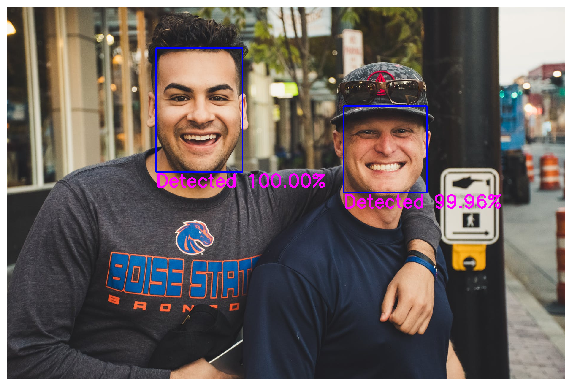

In [38]:
image = cv2.imread("Media/M4/face1.jpeg")
detect_face(image)

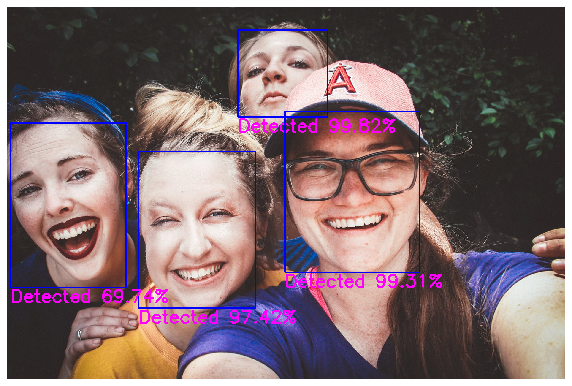

In [39]:
image = cv2.imread("Media/M4/face2.jpeg")
detect_face(image)

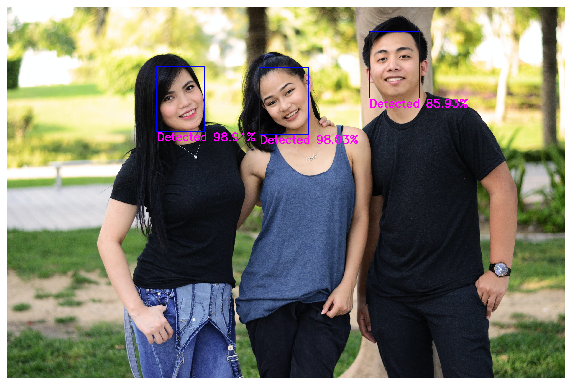

In [40]:
image = cv2.imread("Media/M4/face6.jpg")
detect_face(image)

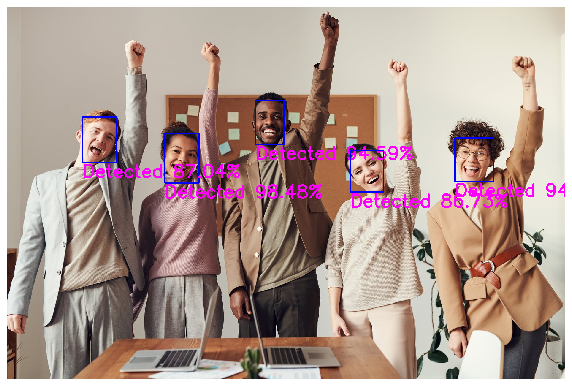

In [41]:
image = cv2.imread("Media/M4/face8.jpeg")
detect_face(image)

####  Capturing Image from Camera

In [ ]:
detect_face(usercam=True)

## <font style="color:rgb(134,19,348)"> Using Intel & Nvidia GPUs </font>

**CPU Time**

In [ ]:
init_detectface()

In [ ]:
%%time
image= detect_face(image = image, returndata=True)

**Intel GPU**

In [ ]:
init_detectface(usegpu = 'opencl')

In [ ]:
%%time
image= detect_face(image = image, returndata=True)

**NVIDIA GPU**

In [ ]:
init_detectface(usegpu = 'cuda')

In [ ]:
%%time
image= detect_face(image = image, returndata=True)

## <font style="color:rgb(134,19,348)"> Live Face Detection</font>

In [42]:
fps=0
init_detectface()
cap=cv2.VideoCapture(1)

while(True):    
    
    start_time = time.time()
    ret,frame=cap.read() 
    image=cv2.flip(frame,1)
    
    image = detect_face(image,returndata=True)
    
    cv2.putText(image, 'FPS: {:.2f}'.format(fps), (5, 25), cv2.FONT_HERSHEY_SIMPLEX,1, (255, 20, 55), 1)
    cv2.imshow("Face Detection",image)
    
    k = cv2.waitKey(1)
    fps= (1.0 / (time.time() - start_time))
    
    if k == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows() 